## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

170500096/170498071 [==============================] - 47s 0us/step
(50000, 32, 32, 3)


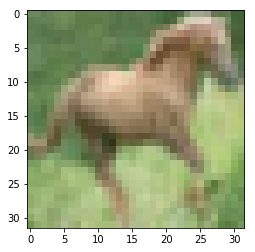

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2256])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


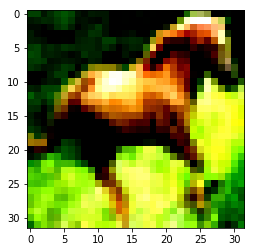

In [7]:
## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test, mean, std
    
    
## Normalize Training and Testset    
x_train, x_test, mean_train, std_train = normalize(x_train, x_test)
plt.imshow(x_train[2256])
plt.show()

In [8]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:

classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(32,(3,3),input_shape=(32,32,3),activation='relu'))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())

'''自己決定MaxPooling2D放在哪裡'''
classifier.add(MaxPooling2D())

#卷積組合
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(BatchNormalization())

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(units=100,activation='relu')) #output_dim=100,activation=relu

#輸出
classifier.add(Dense(units=10,activation='softmax'))

classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)              

In [32]:
#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
500/500 [==============================] - 44s 88ms/step - loss: 0.1363 - accuracy: 0.9535
Epoch 2/10
500/500 [==============================] - 45s 90ms/step - loss: 0.1003 - accuracy: 0.9670
Epoch 3/10
500/500 [==============================] - 47s 93ms/step - loss: 0.0777 - accuracy: 0.9744
Epoch 4/10
500/500 [==============================] - 42s 84ms/step - loss: 0.0820 - accuracy: 0.9725
Epoch 5/10
500/500 [==============================] - 41s 81ms/step - loss: 0.0695 - accuracy: 0.9765
Epoch 6/10
500/500 [==============================] - 41s 82ms/step - loss: 0.0625 - accuracy: 0.9783
Epoch 7/10
500/500 [==============================] - 43s 87ms/step - loss: 0.0539 - accuracy: 0.9825
Epoch 8/10
500/500 [==============================] - 43s 86ms/step - loss: 0.0582 - accuracy: 0.9800
Epoch 9/10
500/500 [==============================] - 41s 82ms/step - loss: 0.0560 - accuracy: 0.9809
Epoch 10/10
500/500 [==============================] - 44s 88ms/step - loss: 0.059

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [63]:
aa = classifier.predict(x_test)

In [65]:
count = 0
for i in range(len(aa)):
    predy = np.where(aa[i] == max(aa[i]))
    truthy = np.where(y_test[i] == max(y_test[i]))
    if predy == truthy:
        count+=1
count/len(aa)    

0.6659

In [66]:
aa = classifier.predict(x_train)
count = 0
for i in range(len(aa)):
    predy = np.where(aa[i] == max(aa[i]))
    truthy = np.where(y_train[i] == max(y_train[i]))
    if predy == truthy:
        count+=1
count/len(aa)   

0.97904